In [116]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [120]:
PARTS = 10
alpha = 5

In [74]:
letters_parts = []
for i in range(10):
    letters_part = []
    for letter_filename in os.listdir('messages/part' + str(i + 1)):
        letter_file = open("messages/part" + str(i + 1) + "/" + letter_filename, "r")
        theme = letter_file.readline()[9:-1]
        letter_file.readline()
        text = letter_file.readline()[:-1]
        letters_part += [(theme, text, 1 if "legit" in letter_filename else 0)]
    letters_parts += [letters_part]

In [75]:
def create_dict(test_id):
    d = [{}, {}] # spam_title, spam_text, legit_title, legit_text
    legit_count, spam_count = 0, 0
    for i in range(PARTS):
        if i == test_id:
            continue
        
        for letter in letters_parts[i]:
            if letter[2] == 1:
                legit_count += 1
            else:
                spam_count += 1
                
            # modification with merging title and text
            combo = (letter[0] + letter[1]).split()
            for s in combo:
                if s in d[letter[2]]:
                    d[letter[2]][s] += 1
                else:
                    d[letter[2]][s] = 1
            
    return (d, legit_count, spam_count)

In [113]:
def prec_rec(actual, predicted):
    tp, fp, tn, fn = 0, 0, 0, 0
    for (a, p) in zip(actual, predicted):
        if a == p:
            if p == 1:
                tp += 1
            else:
                tn += 1
        else:
            if p == 1:
                fp += 1
            else:
                fn += 1
    prec = tp / (tp + fp)
    rec = tp / (tp + fn) 
    return (prec, rec)

In [127]:
def predict(test_id, d, legit_count, spam_count, lam):
    p_legit_abs = math.log(legit_count / (legit_count + spam_count))
    legit_weight = sum([d[1][k] for k in d[1]])
    spam_weight = sum([d[0][k] for k in d[0]])
    p_spam_abs = math.log(spam_count / (legit_count + spam_count))
    res = []
    for letter in letters_parts[i]:
        def getFromD(dic, key):
            return alpha + (dic[key] if key in dic else 0)
        
        combo = (letter[0] + letter[1]).split()
        '''
        p_legit = p_legit_abs 
        for s in combo:
            p_legit += math.log(getFromD(d[1], s) / ((alpha * len(d[1]) + legit_weight)))
            '''
        p_legit = p_legit_abs + sum([math.log(lam * getFromD(d[1], s) / (alpha * len(d[1]) + legit_weight)) for s in combo])
        p_spam = p_spam_abs + sum([math.log(getFromD(d[0], s) / (alpha * len(d[0]) + spam_weight)) for s in combo])
        #res += [1 if p_legit*lam > p_spam else 0]
        res += [1 if p_legit > p_spam else 0]
    return res

mean rec 0.8032786885245903 mean prec 0.9900989199462291
mean rec 0.9245901639344263 mean prec 0.966238085783625
mean rec 0.980327868852459 mean prec 0.8988936676797448
mean rec 0.9967213114754099 mean prec 0.8113334287640273
mean rec 0.9983606557377049 mean prec 0.7225195582578625
mean rec 0.9983606557377049 mean prec 0.6429980079185579
mean rec 1.0 mean prec 0.5960451983548025
mean rec 1.0 mean prec 0.5755943666435643
mean rec 1.0 mean prec 0.5696353220018124
mean rec 1.0 mean prec 0.5669655626419396


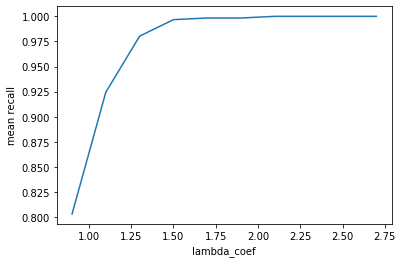

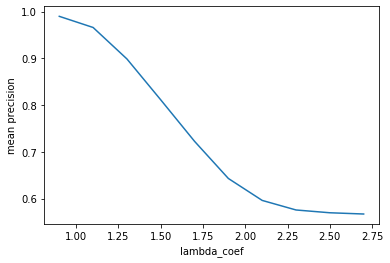

In [138]:
lam_list = []
mean_rec_list = []
mean_prec_list = []
for lam_koef in range(10):
    rec_sum = 0.0
    prec_sum = 0.0
    lam = 0.9 + lam_koef / 5
    #lam = lam_koef + 1
    for i in range(10):
        d, legit_count, spam_count = create_dict(i)
        prediction = predict(i, d, legit_count, spam_count, lam)
        actual = [letter[2] for letter in letters_parts[i]]
        prec, rec = prec_rec(actual, prediction)
        rec_sum += rec
        prec_sum += prec
    lam_list += [lam]
    mean_rec_list += [rec_sum / 10]
    mean_prec_list += [prec_sum / 10]
    print("mean rec", rec_sum / 10, "mean prec", prec_sum / 10)
plt.plot(lam_list, mean_rec_list)
plt.xlabel('lambda_coef')
plt.ylabel('mean recall')
plt.show()
plt.plot(lam_list, mean_prec_list)
plt.xlabel('lambda_coef')
plt.ylabel('mean precision')
plt.show()
    
